In [1]:
# Declare whether you are on Colab or local
colab = True

In [2]:
if colab==True:
  
  #Mount drive
  from google.colab import drive
  drive.mount('/content/drive')

  #set path to data in Google Drive
  data_path = "/content/drive/MyDrive/2022_Analytics Lab Student Projects/Data/All Topics"

  #install required packages
  !pip install duckdb
  !pip install -U sentence-transformers

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13.9 MB 10.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79 kB 5.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.2 MB 32.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.2 MB 70.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 86 kB 5.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.6 MB 54.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

In [3]:
#!pip install -U sentence-transformers

In [4]:
# Import sentence_transformers 
from sentence_transformers import SentenceTransformer, util

In [5]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import sqlalchemy
#%load_ext sql

In [6]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

**Task: Automated Ontology Refinement with Sentence Similarity**
<br>
- Task
  - Identification of new entity candidates
  - Semi-automatic procedure for enhancing the ontology
- Learning
  - SentenceBERT (pretrained)
    - Fine-tuning with ontology
    - Pairs of phrases, e.g. entities and synonyms
    - Identification of candidate entities (noun phrases?)
- Input
  - entities.csv
  - sentences.csv


# Test iteration over sample article and find similarities between ontology and sentences in article 

## Load data

### `sentences.csv`

In [7]:
# Load sentences
if colab==True:
  sentences = pd.read_csv(data_path+"/Fulltext of Corpus/sentences.csv")
else:
  sentences = pd.read_csv("../Data/FulltextofCorpus/sentences.csv")

In [8]:
# Assess shape of sentences.csv
sentences.shape

(6563319, 10)

In [9]:
# Subset only first article
sample_article_df = sentences.loc[sentences.article_id==1]
sample_article_df.shape

(1013, 10)

In [10]:
# delete sentences from RAM
del sentences 

In [11]:
sample_article_df.head()

article_id sentence_id para_id  \
0           1       1_0_1     1_0   
1           1       1_1_2     1_0   
2           1      1_2_22     1_0   
3           1     1_22_23     1_1   
4           1     1_23_24     1_1   

                                            sentence  section_nr  \
0                                                              0   
1                                    START_TITLE_TAG           0   
2  Examining interdependence between product user...           0   
3                                 START_ABSTRACT_TAG           0   
4                                                              0   

  last_section_title last_subsection_title sentence_type references  \
0                NaN                   NaN         EMPTY         []   
1                NaN                   NaN           TAG         []   
2                NaN                   NaN     PARAGRAPH         []   
3                NaN                   NaN           TAG         []   
4           Abstract                   NaN         EMPTY         []   

   number_of_citations  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [12]:
# Check values in colums of interest
sample_article_df.sentence_type.value_counts()

PARAGRAPH        357
TAG              279
EMPTY            146
TABLE            135
HEADER            24
CAPTION           22
FORMULA           17
ABSTRACT          11
ANNEX             11
TABLE_HEADER       6
FIGURE_HEADER      2
HYP_NUMBER         1
HYPOTHESIS         1
FIGURE             1
Name: sentence_type, dtype: int64

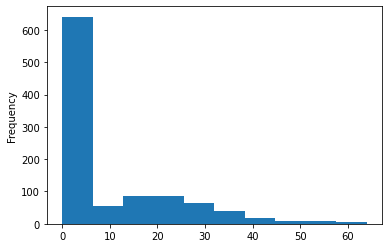

In [18]:
# Check distributiton of no. of words per sentence
sample_article_df.sentence.apply(lambda x: len(x.split())).plot(kind="hist");

> **Input Sequence Length:**<br>"By default, the sentence_transformers provided methods use a limit fo 128 word pieces, longer inputs will be truncated."

- Default input sequence length should not be an issue for this sample article
- We should assess distribution of number of words per sentence for all articles in the DB


### `isrecon.duckdb`

In [19]:
# Note that DBeaver must be closed, before you can run this command!
if colab==True:
  con = duckdb.connect(database=data_path+'/Extracted Information of Corpus/isrecon.duckdb', read_only=False)
else:
  con = duckdb.connect(database='../Data/ExtractedInformationofCorpus/isrecon.duckdb', read_only=False)

In [20]:
# Load first article as df
entities_sample_article = entities = con.execute("""
                       SELECT *
                       FROM entities e
                       WHERE e.article_id = 1""").fetchdf()

entities_sample_article.shape

(132, 46)

In [21]:
entities_sample_article.ent_id.nunique()

46

In the first article 
- Total of 132 entities have been found
- 46 unique entities have been found

In [22]:
entities_sample_article.head()

article_id para_id  sentence_start sentence_id section_title  \
0           1     1_3             322   1_322_354  Introduction   
1           1     1_3             467   1_467_502  Introduction   
2           1     1_3             502   1_502_527  Introduction   
3           1     1_4             530   1_530_551  Introduction   
4           1     1_5             861   1_861_886  Introduction   

  subsection_title         label                ent_id  \
0              NaN         TOPIC  knowledge repository   
1              NaN         TOPIC      digital platform   
2              NaN    TECHNOLOGY        Salesforce.com   
3              NaN         TOPIC  participatory design   
4              NaN  PARTICIPANTS     group participant   

                  level_1        level_2  ... attr_double attr_stage  \
0  domain specific entity       IS topic  ...           0          0   
1  domain specific entity       IS topic  ...           0          0   
2  domain specific entity  IS technology  ...           0          0   
3  domain specific entity       IS topic  ...           0          0   
4  domain specific entity   study object  ...           0          0   

  attr_type attr_temporal attr_assumption attr_dsr attr_paired attr_setting  \
0         0             0               0        0           0            0   
1         0             0               0        0           0            0   
2         0             0               0        0           0            0   
3         0             0               0        0           0            0   
4         0             0               0        0           0            0   

  attr_level attr_tool  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          1         0  

[5 rows x 46 columns]

In [23]:
#Check columns and datatypes
entities_sample_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   article_id        132 non-null    int64  
 1   para_id           132 non-null    object 
 2   sentence_start    132 non-null    int64  
 3   sentence_id       132 non-null    object 
 4   section_title     120 non-null    object 
 5   subsection_title  0 non-null      object 
 6   label             132 non-null    object 
 7   ent_id            132 non-null    object 
 8   level_1           132 non-null    object 
 9   level_2           132 non-null    object 
 10  level_3           130 non-null    object 
 11  level_4           118 non-null    object 
 12  level_5           66 non-null     object 
 13  level_6           19 non-null     object 
 14  level_7           6 non-null      object 
 15  level_8           3 non-null      object 
 16  level_9           2 non-null      object 
 1

- It needs to be clarified, which of these columns are relevant for the task (assumption only first ~17 are somehow relevant for us)
- Which columns do we need for the training (probably only sentence_id, entity_id, synoyms)? 

In [24]:
# Check which sentences have more than one label 
entities_sample_article[entities_sample_article['sentence_id']\
                        .map(entities_sample_article['sentence_id'].value_counts()) > 1]

article_id para_id  sentence_start    sentence_id  \
11            1    1_12            1410    1_1410_1433   
12            1    1_12            1410    1_1410_1433   
14            1    1_12            1455    1_1455_1476   
15            1    1_12            1455    1_1455_1476   
16            1    1_12            1476    1_1476_1498   
17            1    1_12            1476    1_1476_1498   
19            1    1_19            2348    1_2348_2387   
20            1    1_19            2348    1_2348_2387   
23            1    1_19            2502    1_2502_2568   
24            1    1_19            2502    1_2502_2568   
35            1    1_28            3572    1_3572_3609   
36            1    1_28            3572    1_3572_3609   
38            1    1_28            3713    1_3713_3755   
39            1    1_28            3713    1_3713_3755   
40            1    1_28            3713    1_3713_3755   
41            1    1_28            3713    1_3713_3755   
46            1    1_32            4347    1_4347_4361   
47            1    1_32            4347    1_4347_4361   
72            1    1_66            6816    1_6816_6843   
73            1    1_66            6816    1_6816_6843   
92            1    1_80            7989    1_7989_8022   
93            1    1_80            7989    1_7989_8022   
94            1    1_80            7989    1_7989_8022   
95            1    1_80            8051    1_8051_8110   
96            1    1_80            8051    1_8051_8110   
99            1    1_80            8187    1_8187_8224   
100           1    1_80            8187    1_8187_8224   
107           1    1_93            9812    1_9812_9873   
108           1    1_93            9812    1_9812_9873   
109           1    1_93            9873    1_9873_9914   
110           1    1_93            9873    1_9873_9914   
117           1   1_111           10835  1_10835_10877   
118           1   1_111           10835  1_10835_10877   
126           1   1_131           11845  1_11845_11883   
127           1   1_131           11845  1_11845_11883   
128           1   1_131           11845  1_11845_11883   
129           1   1_131           11845  1_11845_11883   

                                         section_title subsection_title  \
11             Firm-hosted online branding communities              NaN   
12             Firm-hosted online branding communities              NaN   
14             Firm-hosted online branding communities              NaN   
15             Firm-hosted online branding communities              NaN   
16             Firm-hosted online branding communities              NaN   
17             Firm-hosted online branding communities              NaN   
19   Social exchange theory and knowledge contribut...              NaN   
20   Social exchange theory and knowledge contribut...              NaN   
23   Social exchange theory and knowledge contribut...              NaN   
24   Social exchange theory and knowledge contribut...              NaN   
35   Reading Employee-Generated content and knowled...              NaN   
36   Reading Employee-Generated content and knowled...              NaN   
38   Reading Employee-Generated content and knowled...              NaN   
39   Reading Employee-Generated content and knowled...              NaN   
40   Reading Employee-Generated content and knowled...              NaN   
41   Reading Employee-Generated content and knowled...              NaN   
46   Readership of Employee-Generated content and k...              NaN   
47   Readership of Employee-Generated content and k...              NaN   
72                      Discussion quantity (Quantity)              NaN   
73                      Discussion quantity (Quantity)              NaN   
92                                             Table 5              NaN   
93                                             Table 5              NaN   
94                                             Table 5              NaN   


Each sentence in entities can have more than one entities -> this will lead to an increase in rows when merged to sentences.csv

### `isntology.csv`

In [25]:
# Load ontology
if colab==True:
  ontology_syn = pd.read_csv(data_path+"/Synonyms in Ontology/isontology.csv", index_col=0)
else:
  ontology_syn = pd.read_csv("../Data/SynonymsinOntology/isontology.csv", index_col=0)
ontology_syn.shape

(390838, 4)

In [26]:
#Display head
ontology_syn.head()

entity_id                category  label  \
0     IS topic  domain specific entity  TOPIC   
1     IS topic  domain specific entity  TOPIC   
2  IS sourcing  domain specific entity  TOPIC   
3  IS sourcing  domain specific entity  TOPIC   
4  IS sourcing  domain specific entity  TOPIC   

                                             synonym  
0                                          is topics  
1                                           is topic  
2  information and communications technologies so...  
3                                        it sourcing  
4     information communications technology sourcing

In [27]:
# Check different values for "label" column
ontology_syn.label.value_counts()

PARTICIPANTS         235200
COLLECTION_METHOD     60176
TECHNOLOGY            39336
TOPIC                 22599
VALIDITY              16874
ANALYSIS_METHOD        4051
CONCEPTUAL_METHOD      3219
SECTOR                 2869
METRIC                 2728
MODEL_ELEMENT          1302
THEORY                 1188
COMPANY_TYPE            550
SAMPLING                372
PARADIGM                330
LEVEL                    44
Name: label, dtype: int64

- Looking at the ontology in protege, it is not clear for me what exactly the label column contains and how it is related to the hierarchy of the ontology. 
- My guess is that it is the first level of the ontology, but it seems that the words in the .csv slightly differ from the ones in protege or .json (e.g. json: "research paradigm" but in isontology.csv: "PARADIGM"

In [28]:
# Check different values for "category" column
ontology_syn.category.value_counts()

study object              235750
domain specific entity     64804
research method            63395
methodological entity      24025
theoretical entity          2864
Name: category, dtype: int64

- The column `category` seem to contain the "level 0" of the ontology 
- However this level 0 does no texist in the json file and in protege the five different categories are distributed over the 1st & 2nd level ? (Only domain specific entity, methodological entity, theoretical entity are in 1st level of protege file)

In [29]:
# Check number of synonyms per entity_id
ent_sy_group = ontology_syn.groupby("entity_id")[["synonym"]].nunique().sort_values(by="synonym", ascending=False)

In [30]:
ent_sy_group

synonym
entity_id                                    
individual participant                 220966
survey                                  42098
three validities                        16002
online learning system                  10075
communication service infrastructure     8932
...                                       ...
generative adversarial network              2
mutual information                          1
World of Warcraft                           1
conditional mutual information              1
Google news                                 1

[2689 rows x 1 columns]

For each of the 2689 unique entities there is one/many synonym(s)

In [31]:
# Check how many entities have more than 100 synonyms
ent_sy_group[ent_sy_group["synonym"]>100]

synonym
entity_id                                    
individual participant                 220966
survey                                  42098
three validities                        16002
online learning system                  10075
communication service infrastructure     8932
...                                       ...
system integration                        101
systems documentation                     101
IS effectiveness                          101
IT decentralization                       101
IT centralization                         101

[131 rows x 1 columns]

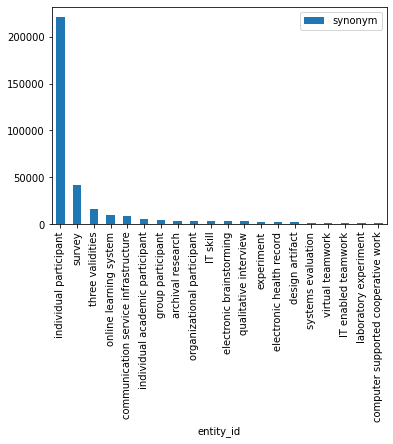

In [32]:
# Plot top 20 entities with most synonyms
ent_sy_group.head(20).plot(kind="bar");

- Apparently there are 220_966 synoyms for individual participant! This will drastically blow up our dimensionality for similarity comparisons 
- 131 entities have more than 100 synonyms. In order to limit the number of possible similarities, we will downsample these 131 entities to 100

In [33]:
# Downsample entities with more than 100 synonyms to a 100 synoyms
idx = ent_sy_group[ent_sy_group["synonym"]>100].index.tolist()

dfs = []
for entity in idx:
  dfs.append((ontology_syn.loc[ontology_syn["entity_id"]==entity]).sample(100))
dfs.append(ontology_syn.loc[~ontology_syn["entity_id"].isin(idx)]) # Append dataframe for all entities with less then 100 synonyms to list

# Combine all dataframes 
ontology_syn_ds = pd.concat(dfs).reset_index(drop=True)

In [34]:
print("Before downsampling:",ontology_syn.shape[0])
print("After downsampling:",ontology_syn_ds.shape[0])

Before downsampling: 390838
After downsampling: 36158


## Load pretrained Sentence-BERT

In [35]:
# Load a pre-trained model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [36]:
print("Max Sequence Length:", model.max_seq_length)

Max Sequence Length: 256


### Test SBERT & Create functions for similarity comparison
Copied from `MiningRelationships.ipynb` notebook

In [37]:
# Use the model to find pair similarities
def find_similarity(model, term1, term2):

    # Compute embedding for both lists
    embeddings1 = model.encode([term1], convert_to_tensor=True)
    embeddings2 = model.encode([term2], convert_to_tensor=True)

    # Compute cosine-similarits
    cosine_score = util.pytorch_cos_sim(embeddings1, embeddings2).item()

    print(cosine_score)

In [38]:
find_similarity(model,"software developer", "software engineer")
find_similarity(model,"database designer", "data architect")
find_similarity(model,"welder", "solderer")

0.8729231357574463
0.6365391612052917
0.3268483281135559


In [39]:
def find_top_similar(model, terms, k=10):
    '''
    Use the model to find similar pairs (compare all sentences against all other sentences)
    Returns a list with the pairs that have the highest cosine similarity score -> [score, idx_sentence1, idx_sentence2]     
    '''
    # Compute highest cosine similarity score
    paraphrases = util.paraphrase_mining(model, terms, show_progress_bar = True, top_k=k)
    
    # Store result in df & add sentences as text
    tmp_df = pd.DataFrame(paraphrases, columns=["cos_sim_score", "idx_sent1", "idx_sent2"])
    tmp_df[["txt_sent1", "txt_sent2"]] = tmp_df[["idx_sent1", "idx_sent2"]].applymap(lambda x:  terms[x])
    
    return tmp_df

In [40]:
find_top_similar(model, ["data science", "data engineer", "welding", "soldering"], 1)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

cos_sim_score  idx_sent1  idx_sent2     txt_sent1      txt_sent2
0       0.684671          0          1  data science  data engineer
1       0.552656          2          3       welding      soldering

The [`util.paraphrase_mining`](https://www.sbert.net/examples/applications/paraphrase-mining/README.html?highlight=paraphrase_mining#sentence_transformers.util.paraphrase_mining) function could be highly relevant for our task.
> - "It compares all sentences against all other sentences and returns a list with the pairs that have the highest cosine similarity score."
- "Instead of computing all pairwise cosine scores and ranking all possible, combintations, the approach is a bit more complex (and hence efficient). We chunk our corpus into smaller pieces ... For example, if we set query_chunk_size=1000, we search paraphrases for 1,000 sentences at a time in the remaining corpus (all other sentences). However, the remaining corpus is also chunked, for example, if we set query_chunk_size=10000, we look for paraphrases in 10k sentences at a time. This is done to reduce the memory requirement"

‚ùóUnfortunately the function only works on one list and therefore is not directly applicabel for our task to compute similarity between sentences and entities. We would need to find a way to combine the sentences and entities into one list, but at the same time avoid the comparison between sentences or between entities ü§î Not sure if this is feasible üòÖ  



### Find similarities between different sentences in sample article 

Sentences with the tags `EMPTY, TAG` do not contain relevant information and thus can be dropped

In [42]:
sample_article_df_clean = sample_article_df.loc[~sample_article_df.sentence_type.isin(["EMPTY", "TAG"])]

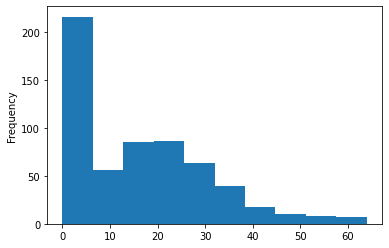

In [44]:
# Check distributiton of no. of words per sentence after removing empty sentences
sample_article_df_clean.sentence.apply(lambda x: len(x.split())).plot(kind="hist");

In [45]:
all_sentences = sample_article_df_clean.sentence.tolist()

In [46]:
# Find similar sentences within sample article
sim_sentences = find_top_similar(model, all_sentences, 2)

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

In [47]:
sim_sentences

cos_sim_score  idx_sent1  idx_sent2  \
0         1.000001        291        410   
1         1.000001        291        420   
2         1.000001        410        420   
3         1.000001        457        291   
4         1.000001        457        410   
..             ...        ...        ...   
890       0.297382        587        558   
891       0.290877        573        151   
892       0.263151        395        288   
893       0.260414        389        385   
894       0.255322        573        587   

                                  txt_sent1  \
0                                         1   
1                                         1   
2                                         1   
3                                      1 \n   
4                                      1 \n   
..                                      ...   
890                                  Weifei   
891  Finding \nDholakia et al. \n \n \n \n    
892                           Wiertz and De   
893                            Jeppesen and   
894  Finding \nDholakia et al. \n \n \n \n    

                                             txt_sent2  
0                                                    1  
1                                                    1  
2                                                    1  
3                                                    1  
4                                                    1  
..                                                 ...  
890                                     Hausman \n8117  
891  (e.g.,  START_CITE Singh et al., 2014; END_CIT...  
892                exp(Œ≥'Zi (t-1)) 1 + exp(Œ≥'Zi (t-1))  
893                                 Baron (2007, 2009)  
894                                             Weifei  

[895 rows x 5 columns]

- There are a lot of identical sentences in the article. 
- However, since our task is not to compare similarity between sentences we ignore this for now
- It might be useful to drop duplicate sentences and maybe preprocess sentences before training/ similarity comparison?

### Find similarities between ontology (without synonyms) and sentences in sample article 

In [48]:
#List of unique entities from ontology (first without synonyms)
entities_unique = ontology_syn.entity_id.unique().tolist()

In [49]:
def find_similarity_sent_ent(model, sentences, entities):
  '''Compute cosine similarity between sentences and entities. Returns dataframe with score, idx & text of entities and sentences'''

  #Compute embeddings
  embeddings_sentences = model.encode(sentences, convert_to_tensor=True, show_progress_bar=True)
  embeddings_entities = model.encode(entities, convert_to_tensor=True, show_progress_bar=True)

  #Compute cosine-similarities for each sentence with each other entity
  cosine_scores = util.cos_sim(embeddings_sentences, embeddings_entities)
  cosine_scores = cosine_scores.cpu().detach().numpy() #convert to numpy

  # Get shape of cosine scores for indexing sentences and entities
  no_rows = cosine_scores.shape[0]
  no_cols = cosine_scores.shape[1]
  
  # Create array representing indices of the cosine_scores grid for indexing sentences and entities
  row, col = np.indices((no_rows, no_cols))

  # Reshape cosine_score, row and col so that there is one row per comparison (similarity between one sentence and one entity)
  cosine_scores = cosine_scores.reshape(no_rows*no_cols,1)
  row = row.reshape(no_rows*no_cols,1)
  col = col.reshape(no_rows*no_cols,1)

  #Stack arrays
  array_tmp = np.hstack((cosine_scores, row, col))

  # Convert to df and recreate text & Sort scores in decreasing order
  pairs_df = pd.DataFrame(array_tmp, columns=['score', 'idx_sentence', 'idx_entity']).sort_values(by="score", ascending=False)
  pairs_df[['idx_sentence', 'idx_entity']] = pairs_df[['idx_sentence', 'idx_entity']].astype("int")
  pairs_df[["txt_sent"]] = pairs_df[["idx_sentence"]].applymap(lambda x:  sentences[x])
  pairs_df[["txt_ent"]] = pairs_df[["idx_entity"]].applymap(lambda x:  entities[x])
  pairs_df = pairs_df.reset_index(drop=True)

  return pairs_df

In [50]:
# Compute similarity between sentences and entities
pairs_df = find_similarity_sent_ent(model, all_sentences, entities_unique)

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

Batches:   0%|          | 0/85 [00:00<?, ?it/s]

‚òù Already takes 30 sec and may become problematic when we want to iterate over all articles or include synonyms

In [51]:
# Show dataframe
pairs_df.head()

score  idx_sentence  idx_entity              txt_sent  \
0  1.000000           494         498           Variable \n   
1  1.000000           452         498           Variable \n   
2  1.000000           571         517  Research Question \n   
3  0.926662           320         498             Variables   
4  0.890720           411        2342     Conceptual Model.   

                txt_ent  
0              variable  
1              variable  
2     research question  
3              variable  
4  conceptual modelling

In [52]:
#pd.set_option('display.max_colwidth', None)

In [53]:
# Drop duplicate sentences 
pairs_df = pairs_df.drop_duplicates(subset=["txt_sent", "txt_ent"])

In [54]:
# Filter for scores >0.65
pairs_df[pairs_df.score>0.65].shape
pairs_df[pairs_df.score>0.65].head(10)

score  idx_sentence  idx_entity  \
0   1.000000           494         498   
2   1.000000           571         517   
3   0.926662           320         498   
4   0.890720           411        2342   
5   0.853788           112        1018   
6   0.816762           411        2282   
7   0.800409           411        2221   
8   0.782838           571         513   
9   0.778290            59        2222   
10  0.757772            82        1018   

                                             txt_sent                 txt_ent  
0                                         Variable \n                variable  
2                                Research Question \n       research question  
3                                           Variables                variable  
4                                   Conceptual Model.    conceptual modelling  
5   This, as indicated by social exchange theory (...  social exchange theory  
6                                   Conceptual Model.     conceptual analysis  
7                                   Conceptual Model.       conceptual method  
8                                Research Question \n     research hypothesis  
9                                   Literature review        literature study  
10  Social exchange theory is based on the univers...  social exchange theory

### Find similarities between ontology (with synonyms) and sentences in sample article 

In [55]:
#List of unique entities from ontology with synonyms without downsampling
entities_syn_unique = ontology_syn.synonym.unique().tolist()

In [56]:
#List of unique entities from ontology with synonyms with downsampling
entities_syn_unique_ds = ontology_syn_ds.synonym.unique().tolist()

In [57]:
print("Number of unique entities wo synonyms:", len(entities_unique))
print("Number of unique entities with synonyms without downsampling:", len(entities_syn_unique))
print("Number of unique entities with synonyms with downsampling:", len(entities_syn_unique_ds))

Number of unique entities wo synonyms: 2689
Number of unique entities with synonyms without downsampling: 390100
Number of unique entities with synonyms with downsampling: 35971


In [58]:
# Compute similarity between sentences and entities with syn with downsampling
pairs_syn_ds_df = find_similarity_sent_ent(model, all_sentences, entities_syn_unique_ds)

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

Batches:   0%|          | 0/1125 [00:00<?, ?it/s]

In [59]:
# Compute similarity between sentences and entities with syn without downsampling
#pairs_syn_df = find_similarity_sent_ent(model, all_sentences, entities_syn_unique)

- ‚òù Runnning this code in Colab on entities with with downsampled synonyms takes ~¬†1:30 min 
- Running the code without downsampling is not possible because of **RAM overload**
- There is also the function `paraphrase_mining`, which improves the brute force comparison, but this only works for one list (sentences or entities or both) --> Need to clarify how to avoid comparison between sentences or comparison between entities?

In [60]:
pairs_syn_ds_df.head()
pairs_syn_ds_df.shape

(21150948, 5)

## Merge tables
In order to finetune our pre-trained model on the ontology we need to combine the sentences with the entities (and synonyms)

In [30]:
# Merge sentences from first article with entities
sample_art_ent = sample_article_df.\
    merge(entities_sample_article[["sentence_id", "ent_id"]], how="left", on="sentence_id")

In [31]:
# Compare snumber of rows from sentences with merged df
sample_art_ent.shape[0]-sample_article_df.shape[0]

21

There are 21 "new" rows, since one sentence can have multiple entities

In [32]:
# Show some sentences with multiple entities
sample_art_ent[sample_art_ent['sentence_id'].map(sample_art_ent['sentence_id'].value_counts()) > 1].head()

article_id  sentence_id para_id  \
89           1  1_1410_1433    1_12   
90           1  1_1410_1433    1_12   
92           1  1_1455_1476    1_12   
93           1  1_1455_1476    1_12   
94           1  1_1476_1498    1_12   

                                             sentence  section_nr  \
89  We next review extant studies on OUC and devel...           2   
90  We next review extant studies on OUC and devel...           2   
92  We collected a total of 815 community document...           2   
93  We collected a total of 815 community document...           2   
94  In addition, a total of 12,315 product users w...           2   

                         last_section_title last_subsection_title  \
89  Firm-hosted online branding communities                   NaN   
90  Firm-hosted online branding communities                   NaN   
92  Firm-hosted online branding communities                   NaN   
93  Firm-hosted online branding communities                   NaN   
94  Firm-hosted online branding communities                   NaN   

   sentence_type references  number_of_citations                  ent_id  
89     PARAGRAPH         []                    0     research hypothesis  
90     PARAGRAPH         []                    0  social exchange theory  
92     PARAGRAPH         []                    0       group participant  
93     PARAGRAPH         []                    0  individual participant  
94     PARAGRAPH         []                    0  individual participant

In [33]:
# Left Join synonyms on merged_df
sample_art_ent_syn = sample_art_ent.merge(ontology_syn, how="left", left_on="ent_id", right_on="entity_id")

In [34]:
# Check shape 
sample_art_ent_syn.shape

(1581937, 15)

In [35]:
# Show number of synonyms/ rows per sentence & entity
sample_art_ent_syn.groupby(["sentence_id", "entity_id"])[["synonym"]].nunique()\
    .sort_values(by="synonym", ascending=False)

synonym
sentence_id   entity_id                      
1_1455_1476   individual participant   220966
1_4457_4496   individual participant   220966
1_5045_5074   individual participant   220966
1_5074_5085   individual participant   220966
1_2641_2667   individual participant   220966
...                                       ...
1_3835_3866   blog                          2
1_4425_4457   competitive advantage         2
1_10695_10701 Salesforce.com                2
1_4701_4727   productivity                  2
1_9873_9914   knowledge creation            2

[129 rows x 1 columns]

The shape of the dataframe increased dramatically, because some entities have a high number of synonyms and thus "blow" up the dataframe

In [36]:
# Remove empty and tag sentences
sample_art_ent_syn_clean = sample_art_ent_syn.loc[~sample_art_ent_syn.sentence_type.isin(["EMPTY", "TAG"])]